In [ ]:
# Imports and data

import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tensorflow import keras
(x_train_c, y_train_c), (x_test_c, y_test_c) = keras.datasets.cifar10.load_data()
(x_train_m, y_train_m), (x_test_m, y_test_m) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Submatrix function that extracts a small submatrix of given size at given position.

def submatrix(matrix, startRow, startCol, size):
  return matrix[(startRow):(startRow+size), (startCol):(startCol+size)]

In [ ]:
# Convololution function that takes either a single 2D or 3D image as input_matrix, and either a single kernel or 
# multiple kernels as input_kernels and returns a stack of feature maps equal to the amount of kernels.


def Convolution(input_matrix, input_kernels):

# Checks whether a single kernel is used or multiple and changes the values used in the loops and output size accordingly.
  if (input_kernels.ndim == 3):
    kerneldepth = len(input_kernels)
    kernel_size = len(input_kernels[0])
  else:
    kerneldepth = 1
    kernel_size = len(input_kernels)

# Checks whether a 2D or 3D image is used and changes the values used in the loops and output size accordingly.
  if input_matrix.ndim == 2:
    depth = 1
    input_height, input_width = input_matrix.shape
  else:
    input_height, input_width, depth = input_matrix.shape

# Creates empty arrays for the outputs
  final_output_size = (kerneldepth, input_height - kernel_size + 1, input_width - kernel_size + 1)
  final_output = np.zeros(final_output_size)
  output_shape = (input_height - kernel_size + 1, input_width - kernel_size + 1)
  final_final_output = np.zeros(output_shape)

# Loops over all the kernels and the depth of the image
  for j in range(kerneldepth):
    for i in range(depth):

      # Selects kernel and image to be used
      output = np.zeros(output_shape)
      kernel = input_kernels[j]
      if depth == 1:
        image = input_matrix
      else:
          image = input_matrix[:,:,i]
      Yimage, Ximage = image.shape
      new_image = np.zeros((input_height - kernel_size + 1, input_width - kernel_size + 1))

      # Loops over the image, selecting a submatrix and multiplying it with the kernel, adding tha result to the new image
      for x in range(Ximage):
        for y in range(Yimage):
          if (x+kernel_size <= Ximage and y+kernel_size <= Yimage):
            sub = submatrix(image, x, y, kernel_size)
            mulitply = np.multiply(kernel,sub)
            add = np.sum(mulitply)
            new_image[x,y] = add
      
      # Adds the multiple multiple feature maps of the 3D images into a single feature map
      output += new_image
    final_output[j] = output
  if (kerneldepth == 1):
    final_output = final_output[0]
  return final_output

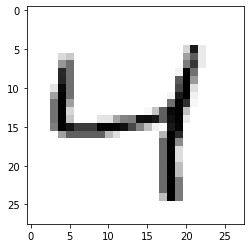

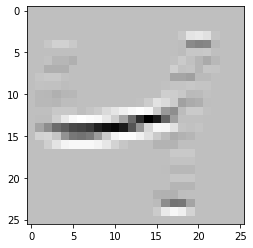

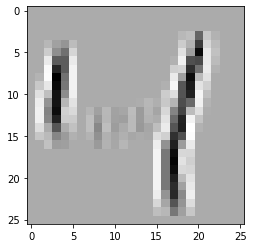

In [ ]:
# Kernels and inputs to show that the convolution function works properly
bothkernels = np.array([[[-1,-1,-1], [2,2,2],[-1,-1,-1]],[[-1,2,-1], [-1,2,-1],[-1,2,-1]]])
single_kernel = np.array([[-1,2,-1], [-1,2,-1],[-1,2,-1]])

min = x_train_m[2]
cif = x_train_c[1]

# Using the convolution function for both 2D and 3D images and a single kernel and multiple kernels
C1cif_singlekernel = Convolution(cif, single_kernel)
C1_singlekernel = Convolution(min, single_kernel)

C1cif = Convolution(cif, bothkernels)
C1 = Convolution(min, bothkernels)

# Prints the images of example image from MNIST dataset and the same image convolved with both kernels
plt.imshow(min, cmap = "Greys")
plt.figure()
plt.imshow(C1[0], cmap = "Greys")
plt.figure()
plt.imshow(C1[1], cmap = "Greys")

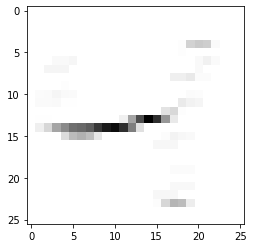

In [ ]:
# Relu activation function that takes a single feature map as input and ensures that all negative numbers become 0
# Returns the non-negative feature map

def relu(input_matrix):  
  output_shape = (input_matrix.shape[0], input_matrix.shape[1])
  output = np.zeros(output_shape)
  for i in range(input_matrix.shape[0]):
    output[i] = np.maximum(0,input_matrix[i])
  return output

# Examples to show that the relu function works
C1relu = relu(C1[0])
plt.imshow(C1relu, cmap = "Greys")

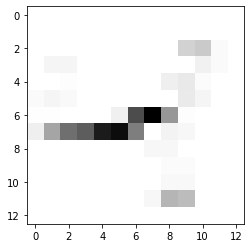

In [ ]:
# Max pool function with a single feature map and the spatial extent of the pooling as input and outputs the maxpooled feature map. 
# Only works for maxpoolsizes that divide the shape of the input matrix into a whole number.

def maxpool(input_matrix, size):
  Xmatrix, Ymatrix = input_matrix.shape
  output = np.zeros((int(Xmatrix/size), int(Ymatrix/size)))
  for x in range(0, Xmatrix, size):
    for y in range(0, Ymatrix, size):
      output[int(x/size),int(y/size)] = input_matrix[x:x+size, y:y+size].max()
  return output

# Example of pooling the previous relu activated image with a 2x2 maxpool filter. 
maxpoolsize = 2
C1maxpool = maxpool(C1relu, maxpoolsize)
plt.imshow(C1maxpool, cmap = "Greys")

[[-0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251
  -0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251
  -0.33322251]
 [-0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251
  -0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251
  -0.33322251]
 [-0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251 -0.33322251
  -0.33322251 -0.33322251 -0.33322251  1.26397479  1.47300397 -0.12419333
  -0.33322251]
 [-0.33322251  0.15987196  0.15987196 -0.33322251 -0.33322251 -0.33322251
  -0.33322251 -0.33322251 -0.33322251 -0.33322251  0.30458447 -0.11347389
  -0.33322251]
 [-0.33322251 -0.33322251 -0.25818639 -0.33322251 -0.33322251 -0.33322251
  -0.33322251 -0.33322251  0.42249836  0.59400948 -0.16171139 -0.33322251
  -0.33322251]
 [-0.12419333  0.13307335 -0.05451694 -0.33322251 -0.33322251 -0.33322251
  -0.33322251 -0.33322251 -0.33322251  0.5511317   0.14915251 -0.33322251
  -0.33322251]
 [-0.28498501 -0.27962

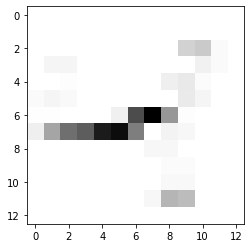

In [ ]:
# Normalise function that takes a single feature map as input and outputs the normalised feature map. 

def normalize(input_matrix):
  matrix = input_matrix
  matrix = matrix - matrix.mean()
  output = matrix/matrix.std()
  return output

# To show that the function works, the normalised image is printed. This shows that the function works as there are now negative numbers. 
# The image remains the same as the values remain the same relatively to each other.
C1norm = normalize(C1maxpool)
plt.imshow(C1norm, cmap = "Greys")
print(C1norm)

In [ ]:
# Fully-connected layer that takes a single matrix and output size as inputs, and outputs the weights and a final layer

def dense_layer(matrix, outputsize):
  flat = matrix.flatten()
  weights = np.zeros((flat.size, outputsize))
  layer = np.zeros((outputsize))

  # Gives all the weights a random value between 0.1 and 0.2
  for x in range(flat.size):
    for y in range(outputsize):
      weights[x,y] = random.uniform(0.1, 0.2)
  
  # Takes the dot product of the weights and the flattened input matrix
  for i in range(outputsize):
    layer[i] = np.dot(weights[:, i], flat)
    
  return weights, layer

outputsize = 10
C1weights, C1layer = dense_layer(C1norm, outputsize)

# Some prints to show that the weights and dense layer have the correct size and outputs
print(C1weights.shape)
print(C1layer)

(169, 10)
[-3.02457798e-01 -2.46998412e-01  4.13421195e-05 -7.47589564e-02
  3.44841090e-01 -2.43726888e-01  7.54861562e-01 -1.48951391e-01
  3.42860474e-01  5.53625357e-01]


In [ ]:
# Softmax function that takes the output from the dense layer and returns the probabilities. 
# Converts the activation of the dense layer into probabilities 

def softmax(layer):
  soft = np.exp(layer)/sum(np.exp(layer))
  return soft

# Some prints to show that the softmax functionw works. All probabilities add up to 1.
# We can select the highest probability and therefor have a prediction using the argmax function.
C1soft = softmax(C1layer)
print(C1soft)
print(sum(C1soft))
print(C1soft.max())
print(C1soft.argmax())

[0.06272775 0.06630486 0.08488547 0.07876767 0.11983344 0.06652214
 0.18057085 0.07313523 0.11959633 0.14765626]
0.18057084858666347
1.0000000000000002
6
